# Surprise Housing Assignment

               Prepared by - Sambhujyoti Das
___

The assignment is divided into the following sections:
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### 1. Data Understanding and Exploration

In [1]:
# Importing necessary libraries

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

#Hide warnings
import warnings
warnings.filterwarnings('ignore')

#### Understanding the dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Finding columns with null values and their percentages

null_columns = df.columns[df.isnull().any()]
(df[null_columns].isnull().sum()/len(df))*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

### 2.  Data Cleaning

In [6]:
# Dropping columns with high percentage of null values

df = df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [7]:
df.shape

(1460, 76)

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The meanings of each features are understood from the data dictionary.

#### Missing value inputation

In [9]:
# Imputing missing values by using median in "Linear feet of street connected to property" column

df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

In [10]:
df.LotFrontage.isnull().sum()

0

In [11]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [12]:
# Impurting missing values with 'None'in "Masonry veneer type" column

df['MasVnrType'].fillna(('None'), inplace=True)

In [13]:
df.MasVnrType.isnull().sum()

0

In [14]:
df.groupby('MasVnrType')['MasVnrArea'].median()

MasVnrType
BrkCmn     192.0
BrkFace    202.0
None         0.0
Stone      206.5
Name: MasVnrArea, dtype: float64

In [15]:
# In dataset the missing values in "Masonry veneer area in square feet" column correspond to the 'None' record 
# of "Masonry veneer type", therefore the missing values are imputed with '0'

df['MasVnrArea'].fillna((0), inplace=True)

In [16]:
df.MasVnrArea.isnull().sum()

0

In [17]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [18]:
df.BsmtQual.isnull().sum()

37

In [19]:
# In "Evaluates the height of the basement" column, 'NA' means 'No Basement', therefore, the missing values 
# are inputed with 'No'

df['BsmtQual'].fillna(('No'), inplace=True)

In [20]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
No     37
Fa     35
Name: BsmtQual, dtype: int64

In [21]:
df.BsmtQual.isnull().sum()

0

In [22]:
df.BsmtCond.isnull().sum()

37

In [23]:
# In "Evaluates the general condition of the basement" column, 'NA' means 'No Basement', 
# therefore, the missing values are inputed with 'No'

df['BsmtCond'].fillna(('No'), inplace=True)

In [24]:
df.BsmtCond.isnull().sum()

0

In [25]:
df['BsmtExposure'].isnull().sum()

38

In [26]:
df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [27]:
# In "Refers to walkout or garden level walls" column, 'NA' means 'No Basement', 
# therefore, the missing values are inputed with 'NB'

df['BsmtExposure'].fillna(('NB'), inplace=True)

In [28]:
df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
NB     38
Name: BsmtExposure, dtype: int64

In [29]:
df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [30]:
df.BsmtFinType1.isnull().sum()

37

In [31]:
# In "Rating of basement finished area" column, 'NA' means 'No Basement', 
# therefore, the missing values are inputed with 'NoB'

df['BsmtFinType1'].fillna(('NoB'), inplace=True)

In [32]:
df.BsmtFinType1.isnull().sum()

0

In [33]:
df.BsmtFinType2.isnull().sum()

38

In [34]:
# In "Rating of basement finished area (if multiple types)" column, 'NA' means 'No Basement', 
# therefore, the missing values are inputed with 'NoB'

df['BsmtFinType2'].fillna(('NoB'), inplace=True)

In [35]:
df.BsmtFinType2.isnull().sum()

0

In [36]:
df.Electrical.isnull().sum()

1

In [37]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [38]:
# In "Electrical system" column, the missing value is imputed with mode, i.e. 'SBrkr'

df['Electrical'].fillna(('SBrkr'), inplace=True)

In [39]:
df.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [40]:
# Since 'NA' means 'No Garage' in these four categorical variables and related to the "Garage", the null values
# are replaced with 'NoGarage'

garag_fields = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for i in garag_fields:
    df[i].fillna(('NoGarage'), inplace=True)

In [41]:
for i in garag_fields:
    print(df[i].isnull().sum())

0
0
0
0


In [42]:
df.GarageYrBlt.isnull().sum()

81

In [43]:
df.GarageYrBlt.mode()

0    2005.0
dtype: float64

In [44]:
# The missing values in "Year garage was built" are imputed with mode value, i.e. 2005

df['GarageYrBlt'].fillna((2005.0), inplace=True)

In [45]:
df.GarageYrBlt.isnull().sum()

0

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Exploring the data distributions and outlier treatments

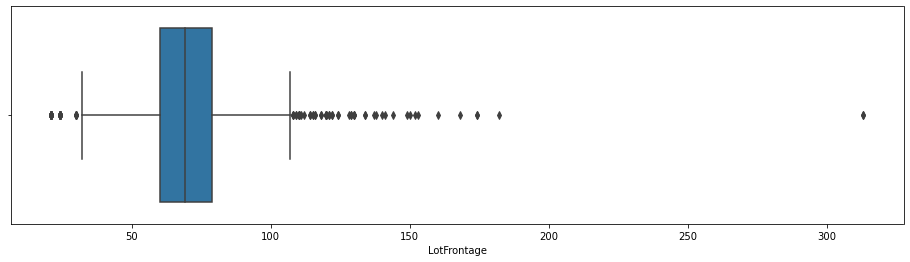

In [47]:
# Visualizing the data distribution

plt.figure(figsize=(16,4))

sns.boxplot('LotFrontage', data=df);

In [48]:
print(np.percentile(df['LotFrontage'], [25, 50, 75, 90, 95, 99]))

[ 60.    69.    79.    92.   104.   137.41]


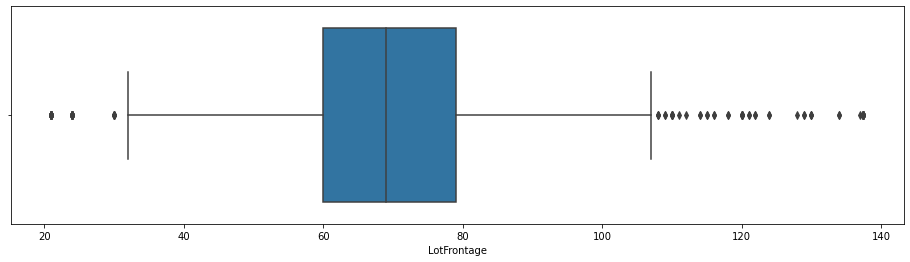

In [49]:
# Capping the value to 99 percentile

df['LotFrontage'] = np.where(df['LotFrontage'] > np.percentile(df['LotFrontage'],99), np.percentile(df['LotFrontage'],99), df['LotFrontage'])

plt.figure(figsize=(16,4))
sns.boxplot('LotFrontage', data=df);

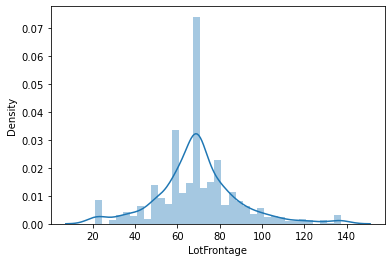

In [50]:
sns.distplot(df.LotFrontage);

The data is now fairly in normal distribution.

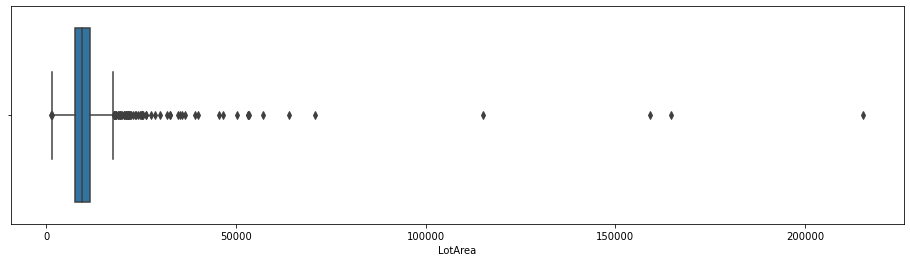

In [51]:
# Visualizing the data distribution

plt.figure(figsize=(16,4))

sns.boxplot('LotArea', data=df);

In [52]:
print(np.percentile(df['LotArea'], [25, 50, 75, 90, 95, 99]))

[ 7553.5   9478.5  11601.5  14381.7  17401.15 37567.64]


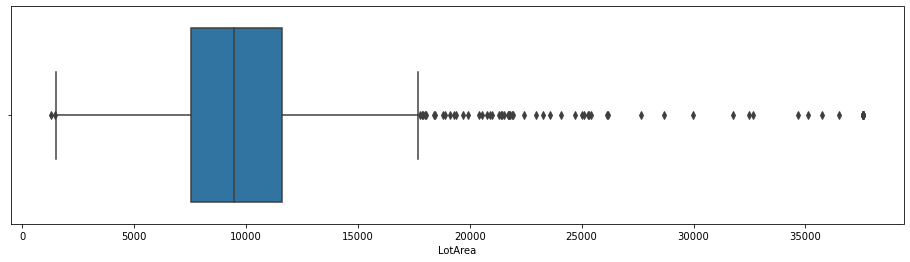

In [53]:
# Capping the value to 95 percentile

df['LotArea'] = np.where(df['LotArea'] > np.percentile(df['LotArea'],99), np.percentile(df['LotArea'],99), df['LotArea'])

plt.figure(figsize=(16,4))
sns.boxplot('LotArea', data=df);

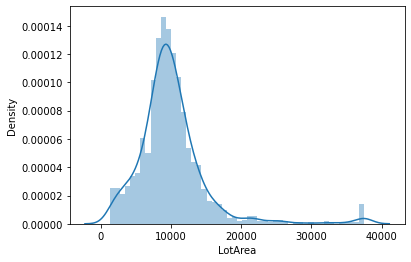

In [54]:
sns.distplot(df.LotArea);

The data is now fairly in normal distribution.

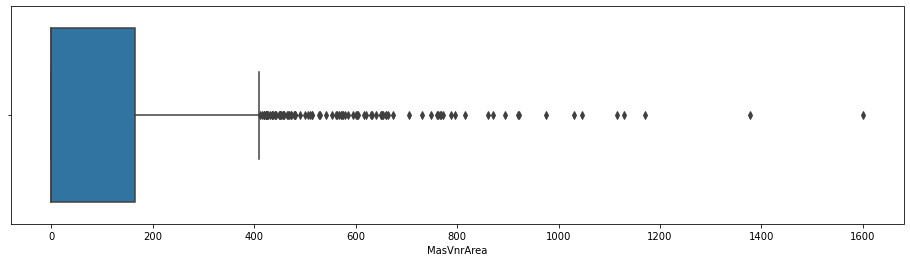

In [55]:
# Visualizing the data distribution

plt.figure(figsize=(16,4))

sns.boxplot('MasVnrArea', data=df);

In [56]:
print(np.percentile(df['MasVnrArea'], [25, 50, 75, 90, 95, 99]))

[  0.     0.   164.25 335.   456.   791.28]


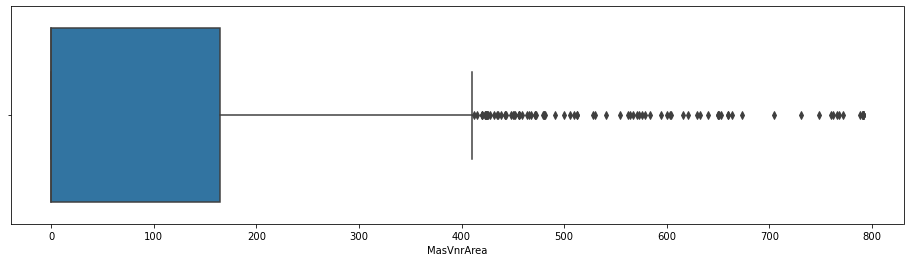

In [57]:
# Capping the value to 99 percentile

df['MasVnrArea'] = np.where(df['MasVnrArea'] > np.percentile(df['MasVnrArea'], 99), np.percentile(df['MasVnrArea'], 99), df['MasVnrArea'])

plt.figure(figsize=(16,4))

sns.boxplot('MasVnrArea', data=df);

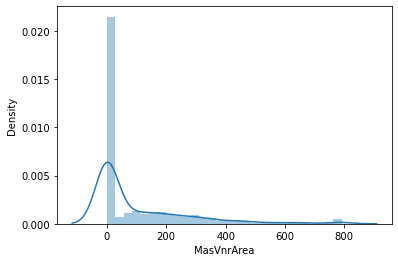

In [58]:
sns.distplot(df.MasVnrArea);

The data is right skewed.

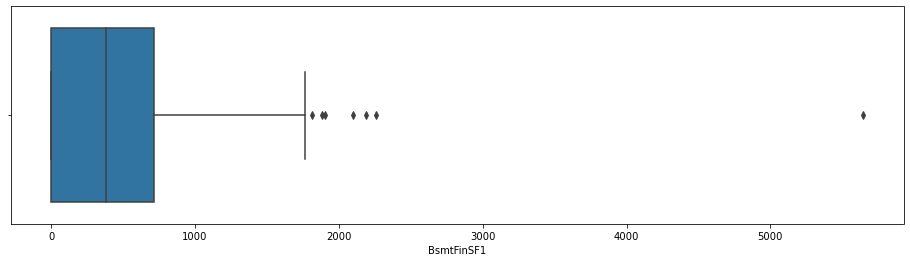

In [59]:
# Visualizing the data distribution

plt.figure(figsize=(16,4))

sns.boxplot('BsmtFinSF1', data=df);

In [60]:
print(np.percentile(df['BsmtFinSF1'], [25, 50, 75, 90, 95, 99]))

[   0.    383.5   712.25 1065.5  1274.   1572.41]


In [61]:
Q1 = df['BsmtFinSF1'].quantile(0.25)
Q3 = df['BsmtFinSF1'].quantile(0.75)
IQR = Q3 - Q1

upper_iqr = Q3 + (1.5 * IQR)
upper_iqr

1780.625

In [62]:
# The few outlier values are ignored and replaced with upper IQR value

df['BsmtFinSF1'] = df['BsmtFinSF1'].apply(lambda x: 1780.625 if x > 1780.625 else x)

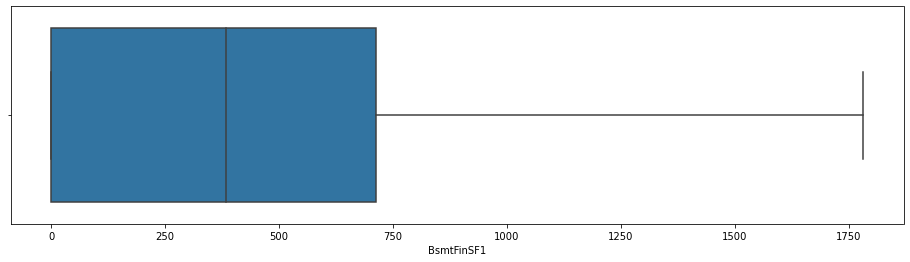

In [63]:
plt.figure(figsize=(16,4))

sns.boxplot('BsmtFinSF1', data=df);

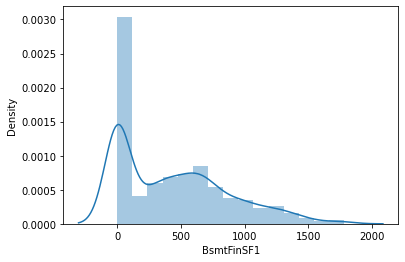

In [64]:
sns.distplot(df.BsmtFinSF1);

The data is right skewed.

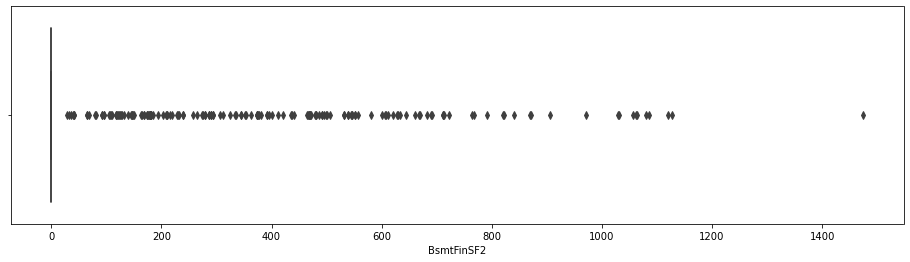

In [65]:
# Visualizing the data distribution

plt.figure(figsize=(16,4))

sns.boxplot('BsmtFinSF2', data=df);

In [66]:
print(np.percentile(df['BsmtFinSF2'], [25, 50, 75, 90, 95, 99]))

[  0.     0.     0.   117.2  396.2  830.38]


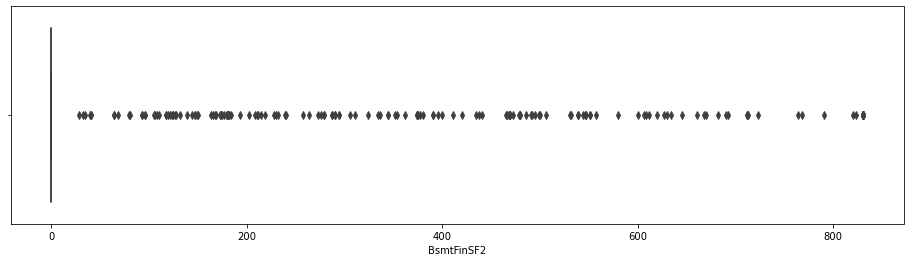

In [67]:
# Capping the value to 99 percentile

df['BsmtFinSF2'] = np.where(df['BsmtFinSF2'] > np.percentile(df['BsmtFinSF2'], 99), np.percentile(df['BsmtFinSF2'], 99), df['BsmtFinSF2'])


plt.figure(figsize=(16,4))

sns.boxplot('BsmtFinSF2', data=df);

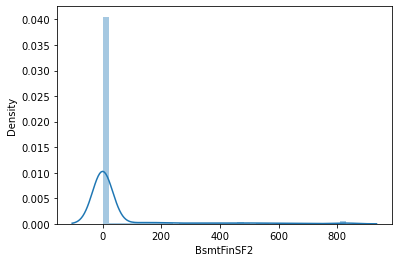

In [68]:
sns.distplot(df.BsmtFinSF2);

The data is largely concentrated on '0' value.

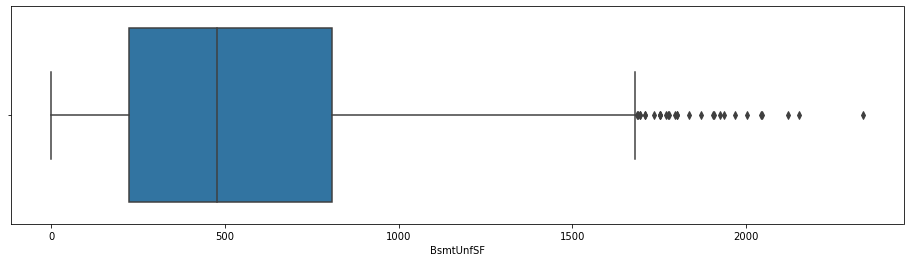

In [69]:
# Visualizing the data distribution

plt.figure(figsize=(16,4))

sns.boxplot('BsmtUnfSF', data=df);

In [70]:
print(np.percentile(df['BsmtUnfSF'], [25, 50, 75, 90, 95, 99]))

[ 223.    477.5   808.   1232.   1468.   1797.05]


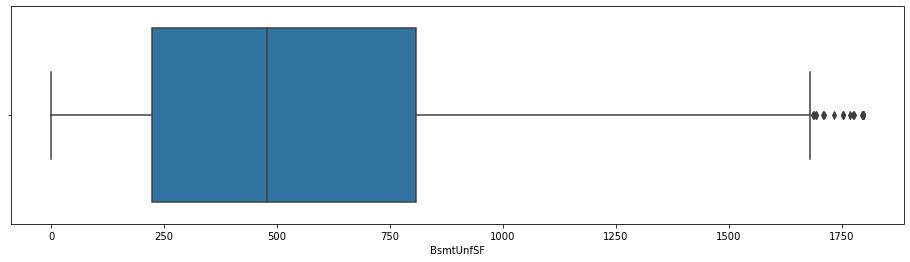

In [71]:
# Capping the value to 99 percentile

df['BsmtUnfSF'] = np.where(df['BsmtUnfSF'] > np.percentile(df['BsmtUnfSF'], 99), np.percentile(df['BsmtUnfSF'], 99), df['BsmtUnfSF'])


plt.figure(figsize=(16,4))

sns.boxplot('BsmtUnfSF', data=df);

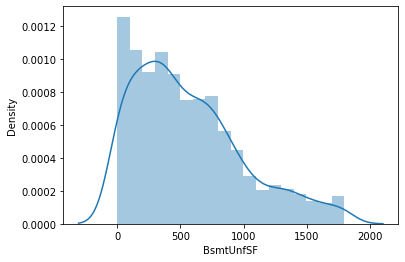

In [72]:
sns.distplot(df.BsmtUnfSF);

The data is right skewed.

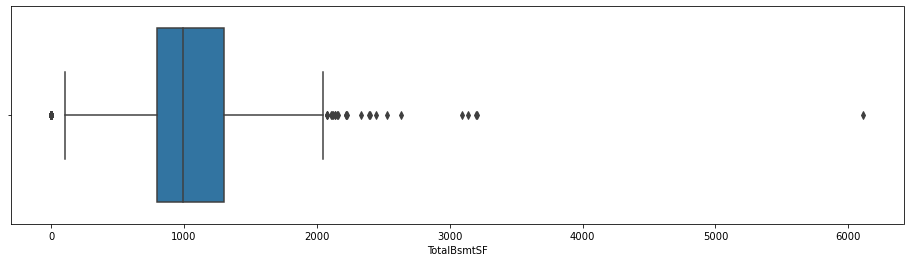

In [73]:
# Visualizing the data distribution

plt.figure(figsize=(16,4))

sns.boxplot('TotalBsmtSF', data=df);

In [74]:
print(np.percentile(df['TotalBsmtSF'], [25, 50, 75, 90, 95, 99]))

[ 795.75  991.5  1298.25 1602.2  1753.   2155.05]


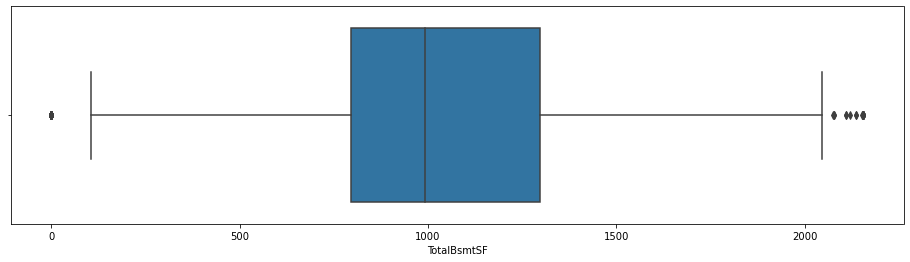

In [75]:
# Capping the value to 99 percentile

df['TotalBsmtSF'] = np.where(df['TotalBsmtSF'] > np.percentile(df['TotalBsmtSF'], 99), np.percentile(df['TotalBsmtSF'], 99), df['TotalBsmtSF'])

plt.figure(figsize=(16,4))

sns.boxplot('TotalBsmtSF', data=df);

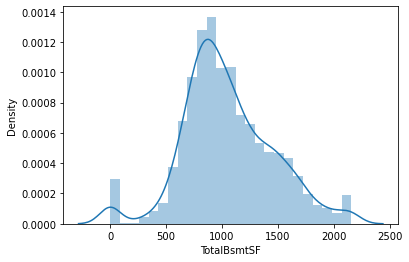

In [76]:
sns.distplot(df.TotalBsmtSF);

The data is fairly in normal distribution.

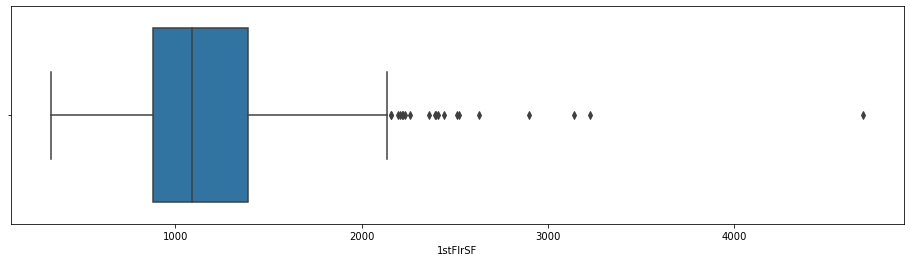

In [77]:
# Visualizing the data distribution

plt.figure(figsize=(16,4))

sns.boxplot('1stFlrSF', data=df);

In [78]:
print(np.percentile(df['1stFlrSF'], [25, 50, 75, 90, 95, 99]))

[ 882.   1087.   1391.25 1680.   1831.25 2219.46]


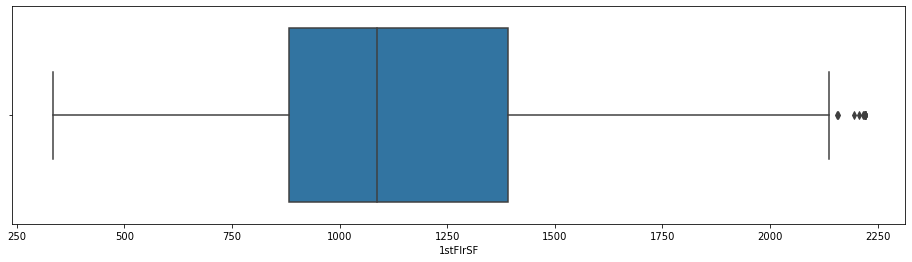

In [79]:
# Capping the value to 99 percentile

df['1stFlrSF'] = np.where(df['1stFlrSF'] > np.percentile(df['1stFlrSF'], 99), np.percentile(df['1stFlrSF'], 99), df['1stFlrSF'])

plt.figure(figsize=(16,4))

sns.boxplot('1stFlrSF', data=df);

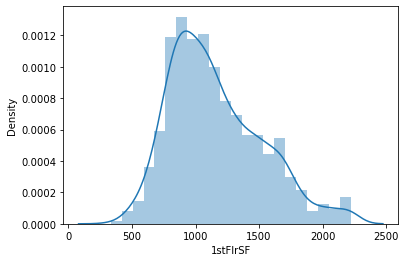

In [80]:
sns.distplot(df['1stFlrSF']);

The data is fairly in normal distribution.

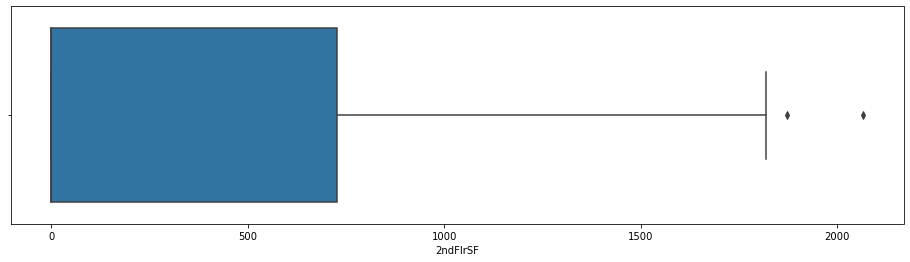

In [81]:
# Visualizing the data distribution

plt.figure(figsize=(16,4))

sns.boxplot('2ndFlrSF', data=df);

In [82]:
Q1 = df['2ndFlrSF'].quantile(0.25)
Q3 = df['2ndFlrSF'].quantile(0.75)
IQR = Q3 - Q1

upper_iqr = Q3 + (1.5 * IQR)
upper_iqr

1820.0

In [83]:
# The few outlier values are ignored and replaced with upper IQR value

df['2ndFlrSF'] = df['2ndFlrSF'].apply(lambda x: 1820.0 if x > 1820.0 else x)

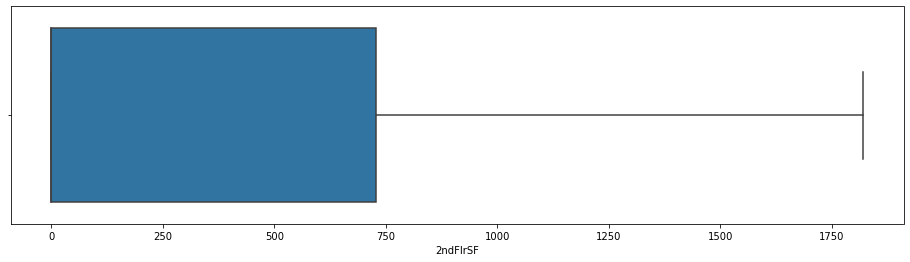

In [84]:
plt.figure(figsize=(16,4))

sns.boxplot('2ndFlrSF', data=df);

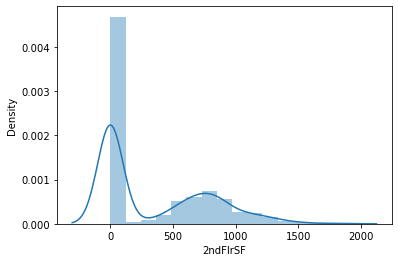

In [85]:
sns.distplot(df['2ndFlrSF']);

The data is largely concentrated on '0' and is right skewed.

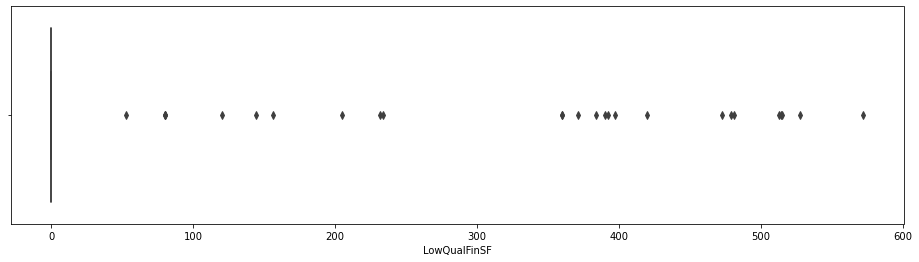

In [86]:
# Visualizing the data distribution

plt.figure(figsize=(16,4))

sns.boxplot('LowQualFinSF', data=df);

In [87]:
print(np.percentile(df['LowQualFinSF'], [25, 50, 75, 90, 95, 99]))

[  0.   0.   0.   0.   0. 360.]


In [88]:
# Since majority of values are '0' only. The column is dropped.

df.drop(['LowQualFinSF'], axis=1, inplace=True)

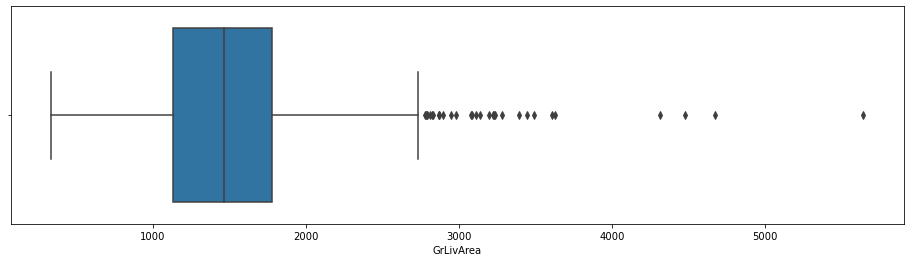

In [89]:
# Visualizing the data distribution

plt.figure(figsize=(16,4))

sns.boxplot('GrLivArea', data=df);

In [90]:
print(np.percentile(df['GrLivArea'], [25, 50, 75, 90, 95, 99]))

[1129.5  1464.   1776.75 2158.3  2466.1  3123.48]


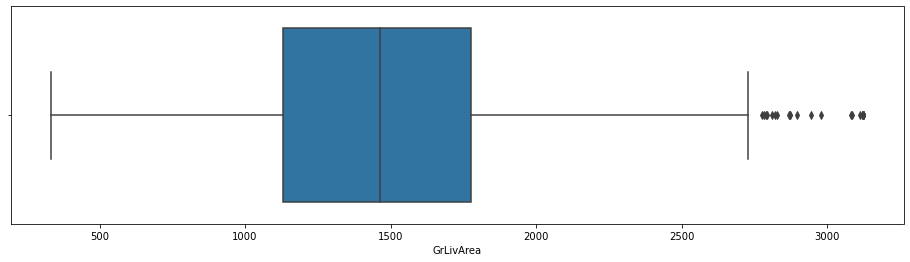

In [91]:
# Capping the value to 99 percentile

df['GrLivArea'] = np.where(df['GrLivArea'] > np.percentile(df['GrLivArea'], 99), np.percentile(df['GrLivArea'], 99), df['GrLivArea'])

plt.figure(figsize=(16,4))

sns.boxplot('GrLivArea', data=df);

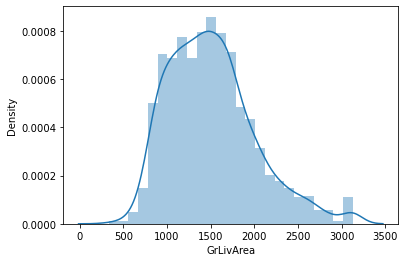

In [92]:
sns.distplot(df.GrLivArea);

The data is fairly in normal distribution.

In [93]:
df.BsmtFullBath.value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [94]:
df.BsmtHalfBath.value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [95]:
df.FullBath.value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [96]:
df.HalfBath.value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

In [97]:
df.BedroomAbvGr.value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [98]:
df.KitchenAbvGr.value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [99]:
df.TotRmsAbvGrd.value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

In [100]:
df.Fireplaces.value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [101]:
df.GarageCars.value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

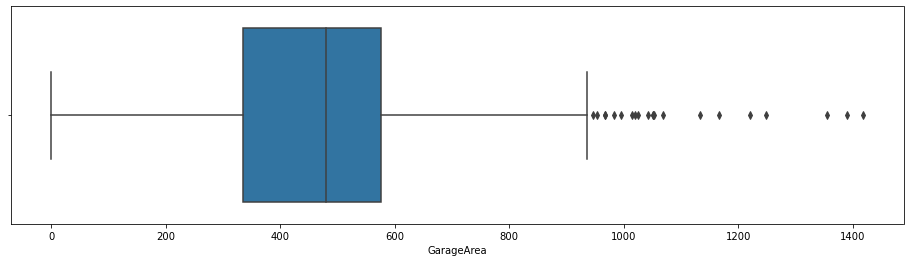

In [102]:
# Visualizing the data distribution

plt.figure(figsize=(16,4))

sns.boxplot('GarageArea', data=df);

In [103]:
print(np.percentile(df['GarageArea'], [25, 50, 75, 90, 95, 99]))

[ 334.5   480.    576.    757.1   850.1  1002.79]


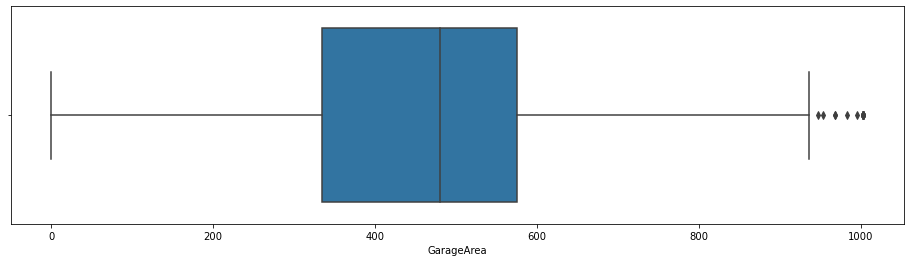

In [104]:
# Capping the value to 99 percentile

df['GarageArea'] = np.where(df['GarageArea'] > np.percentile(df['GarageArea'], 99), np.percentile(df['GarageArea'], 99), df['GarageArea'])

plt.figure(figsize=(16,4))

sns.boxplot('GarageArea', data=df);

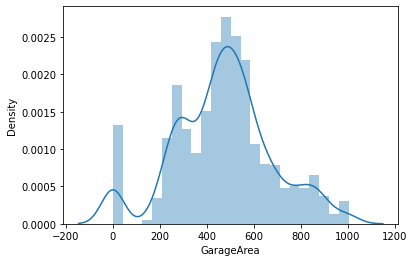

In [105]:
sns.distplot(df.GarageArea);

The data is fairly in normal distribution.

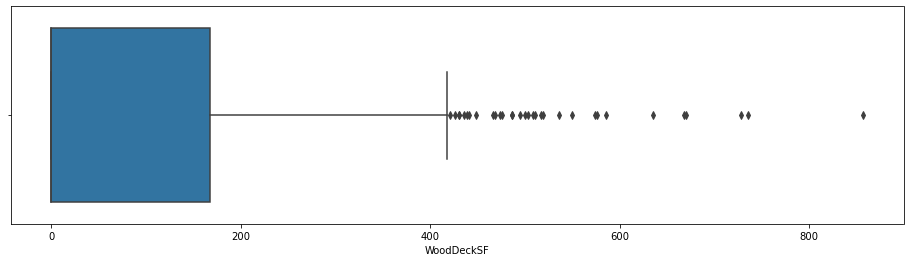

In [106]:
# Visualizing the data distribution

plt.figure(figsize=(16,4))

sns.boxplot('WoodDeckSF', data=df);

In [107]:
print(np.percentile(df['WoodDeckSF'], [25, 50, 75, 90, 95, 99]))

[  0.     0.   168.   262.   335.   505.46]


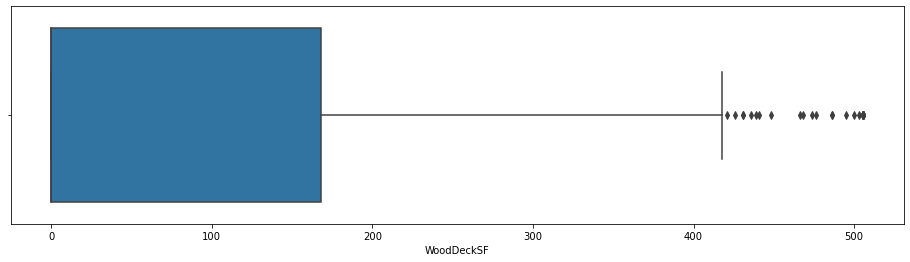

In [108]:
# Capping the value to 99 percentile

df['WoodDeckSF'] = np.where(df['WoodDeckSF'] > np.percentile(df['WoodDeckSF'], 99), np.percentile(df['WoodDeckSF'], 99), df['WoodDeckSF'])

plt.figure(figsize=(16,4))

sns.boxplot('WoodDeckSF', data=df);

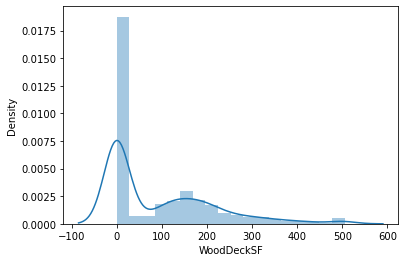

In [109]:
sns.distplot(df.WoodDeckSF);

The distribution is largely concentrated on '0' value and positive skewness.

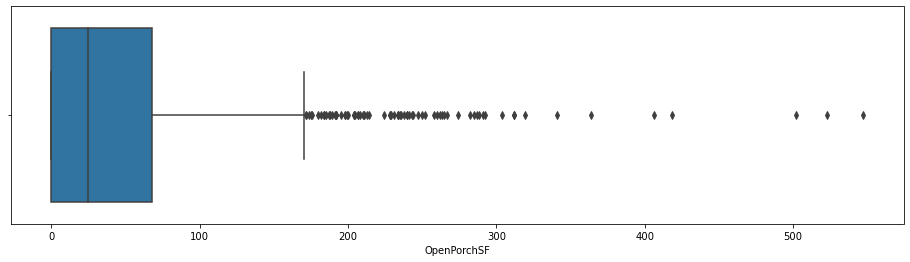

In [110]:
# Visualizing the data distribution

plt.figure(figsize=(16,4))

sns.boxplot('OpenPorchSF', data=df);

In [111]:
print(np.percentile(df['OpenPorchSF'], [25, 50, 75, 90, 95, 99]))

[  0.    25.    68.   130.   175.05 285.82]


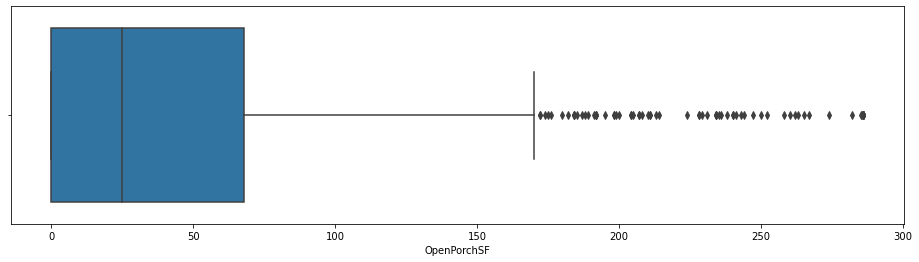

In [112]:
# Capping the value to 99 percentile

df['OpenPorchSF'] = np.where(df['OpenPorchSF'] > np.percentile(df['OpenPorchSF'], 99), np.percentile(df['OpenPorchSF'], 99), df['OpenPorchSF'])

plt.figure(figsize=(16,4))

sns.boxplot('OpenPorchSF', data=df);

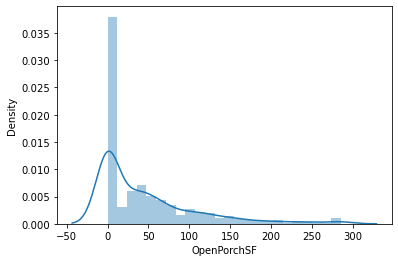

In [113]:
sns.distplot(df.OpenPorchSF);

The distribution is largely concentrated on '0' value and positive skewness.

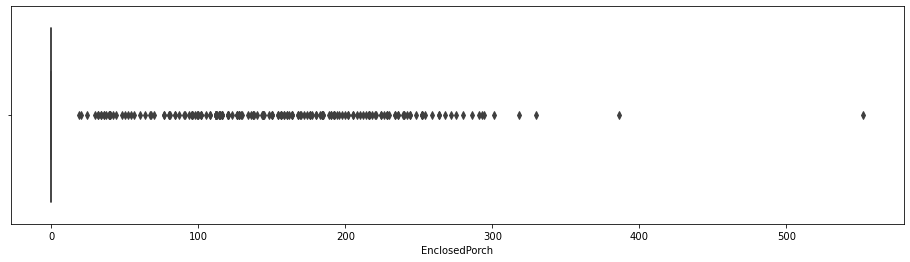

In [114]:
# Visualizing the data distribution

plt.figure(figsize=(16,4))

sns.boxplot('EnclosedPorch', data=df);

In [115]:
print(np.percentile(df['EnclosedPorch'], [25, 50, 75, 90, 95, 99]))

[  0.     0.     0.   112.   180.15 261.05]


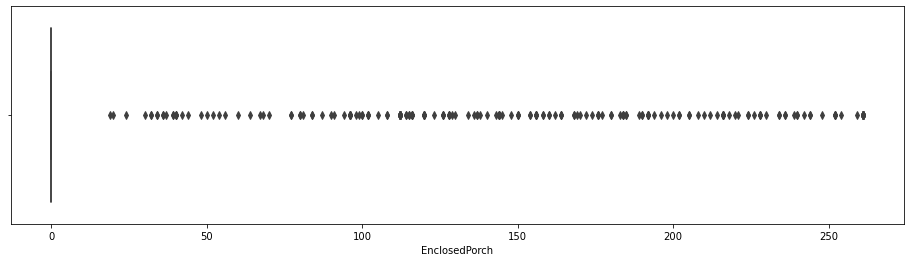

In [116]:
# Capping the value to 99 percentile

df['EnclosedPorch'] = np.where(df['EnclosedPorch'] > np.percentile(df['EnclosedPorch'], 99), np.percentile(df['EnclosedPorch'], 99), df['EnclosedPorch'])

plt.figure(figsize=(16,4))

sns.boxplot('EnclosedPorch', data=df);

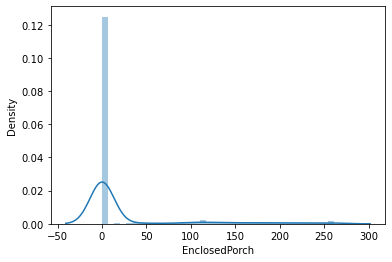

In [117]:
sns.distplot(df.EnclosedPorch);

The data is largely concentrated on '0' value.

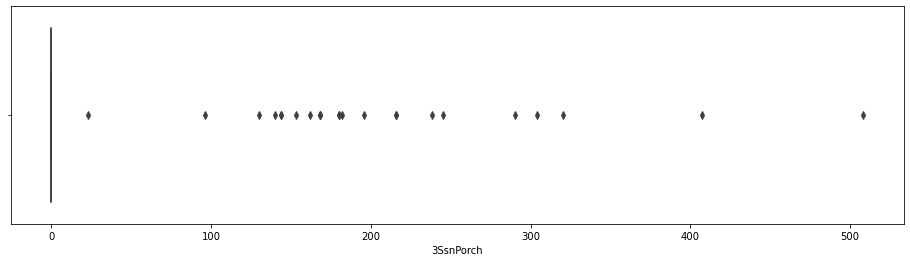

In [118]:
# Visualizing the data distribution

plt.figure(figsize=(16,4))

sns.boxplot('3SsnPorch', data=df);

In [119]:
print(np.percentile(df['3SsnPorch'], [25, 50, 75, 90, 95, 99]))

[  0.   0.   0.   0.   0. 168.]


In [120]:
# Since majority of values are '0' only. The column is dropped.

df.drop('3SsnPorch', axis=1, inplace=True)

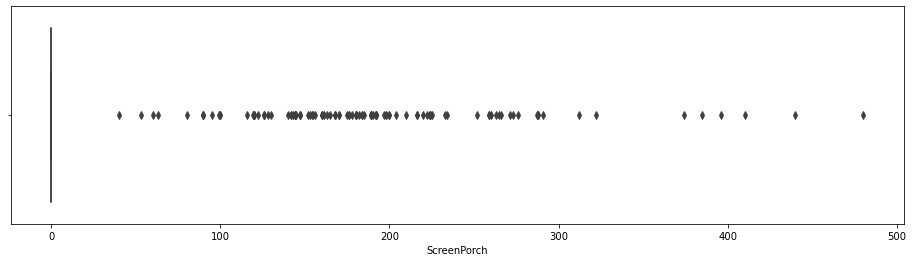

In [121]:
# Visualizing the data distribution

plt.figure(figsize=(16,4))

sns.boxplot('ScreenPorch', data=df);

In [122]:
print(np.percentile(df['ScreenPorch'], [25, 50, 75, 90, 95, 99]))

[  0.     0.     0.     0.   160.   268.05]


In [123]:
# Since majority of values are '0' only. The column is dropped.

df.drop('ScreenPorch', axis=1, inplace=True)

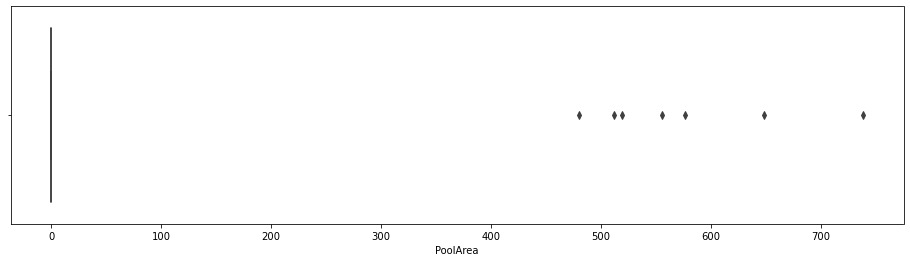

In [124]:
plt.figure(figsize=(16,4))

sns.boxplot('PoolArea', data=df);

In [125]:
df.drop('PoolArea', axis=1, inplace=True)

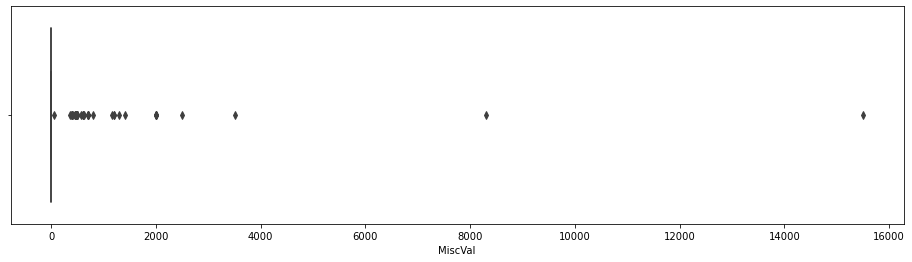

In [126]:
plt.figure(figsize=(16,4))

sns.boxplot('MiscVal', data=df);

In [127]:
print(np.percentile(df['MiscVal'], [25, 50, 75, 90, 95, 99]))

[  0.   0.   0.   0.   0. 700.]


In [128]:
df.drop('MiscVal', axis=1, inplace=True)

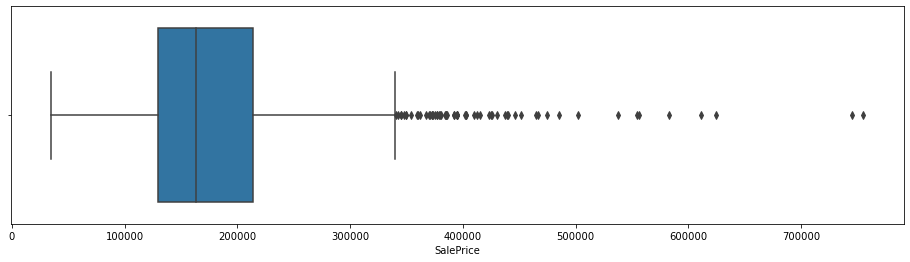

In [129]:
plt.figure(figsize=(16,4))

sns.boxplot('SalePrice', data=df);

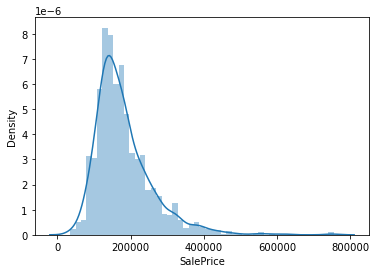

In [130]:
sns.distplot(df.SalePrice);

Outlier values and skewness are present in the data series. Since, "Sale Price" is the target variable, techniques like dropping of rows or capping may cause compromise with the data range. Therefore, data transformation technique is used to handle the skewness / outliers.

In [131]:
# Log transformation of 'SalePrice' data

df['SalePrice'] = np.log(df.SalePrice)

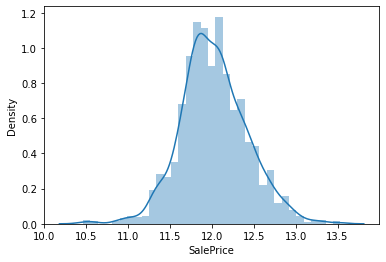

In [132]:
sns.distplot(df.SalePrice);

The skewness is no longer present in the data. The distribution seems to be normal.

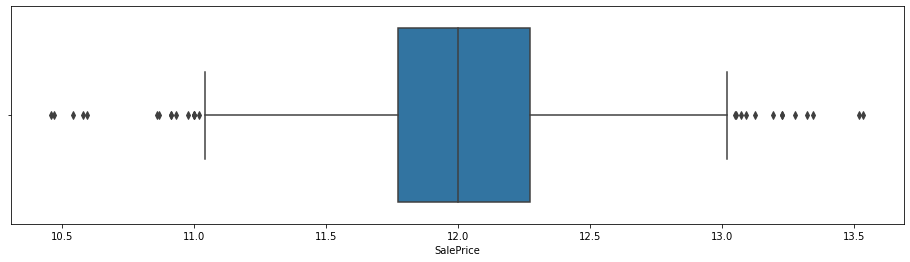

In [133]:
plt.figure(figsize=(16,4))

sns.boxplot('SalePrice', data=df);

The distribution got centralized and the outlier values are distributed at both the sides.

In [134]:
# Converting variable 'MSSubClass' from int to object

df['MSSubClass'] = df.MSSubClass.astype('object')

In [135]:
# Converting variable 'OverallQual' from int to object

df['OverallQual'] = df.OverallQual.astype('object')

In [136]:
# Converting variable 'OverallCond' from int to object

df['OverallCond'] = df.OverallCond.astype('object')

In [137]:
# Converting 'Original construction date' into 'Age of house'

df['HouseAge'] = 2021 - df.YearBuilt

In [138]:
# Dropping columns that do not have business relevance

df.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis=1, inplace=True)

In [139]:
df.drop(['Id'], axis=1, inplace=True)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   object 
 16  OverallCond    1460 non-null   object 
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [141]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold',
       'SaleType', 'SaleCondition', 'S

In [142]:
# Assigning "Sales Price" as y variable

y = df.SalePrice

In [143]:
# Subsetting all categorical variables

df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [144]:
df_categorical.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [145]:
# Subsetting all numerical columns 

df_numeric = df._get_numeric_data()
df_numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,HouseAge
0,65.0,8450.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,1710.0,...,8,0,2,548.0,0.0,61.0,0.00,2,12.247694,18
1,80.0,9600.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,1262.0,...,6,1,2,460.0,298.0,0.0,0.00,5,12.109011,45
2,68.0,11250.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,1786.0,...,6,1,2,608.0,0.0,42.0,0.00,9,12.317167,20
3,60.0,9550.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,1717.0,...,7,1,3,642.0,0.0,35.0,261.05,2,11.849398,106
4,84.0,14260.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,2198.0,...,9,1,3,836.0,192.0,84.0,0.00,12,12.429216,21


In [146]:
# Dropping target variable from the independent variables

df_numeric.drop('SalePrice', axis=1, inplace=True)

In [147]:
# Saving names of numerical columns

num_features = df_numeric.columns

In [148]:
# Understanding data distribution of categorical columns

Cat_col = df_categorical.columns
for i in Cat_col:
    print()
    print(df[i].value_counts())


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Pave    1454
Grvl       6
Name: Street, dtype: int64

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
Clea

In [149]:
# The 'Street' and 'Utilities' variables are largely concentrated on one value, 
# therefore, the columns can be dropped

df_categorical.drop(['Street', 'Utilities'], axis=1, inplace=True)

In [150]:
# Merging category values where individual value count is low

df_categorical['MSZoning'].replace(['FV', 'RH', 'C (all)'], 'Other', inplace=True)

In [151]:
df_categorical['LotShape'].replace(['IR1', 'IR2', 'IR3'], 'IR', inplace=True)

In [152]:
df_categorical['LotConfig'].replace(['FR2', 'FR3'], 'FR', inplace=True)

In [153]:
df_categorical['Neighborhood'].replace(['NPkVill', 'Blueste'], 'Other', inplace=True)

In [154]:
df_categorical['Condition1'].replace(['RRAn', 'RRNn'], 'NSR', inplace=True)
df_categorical['Condition1'].replace(['RRAe', 'RRNe'], 'EWR', inplace=True)
df_categorical['Condition1'].replace(['PosN', 'PosA'], 'POSF', inplace=True)

In [155]:
df_categorical['Condition1'].replace(['RRAn', 'RRNn'], 'NSR', inplace=True)

In [156]:
df_categorical['Condition2'].replace(['Feedr', 'Artery' 'PosN', 'RRNn', 'PosA', 'RRAn', 'RRAe'], 'Special', inplace=True)

In [157]:
df_categorical['HouseStyle'].replace(['1.5Fin', '1.5Unf'], '1.5Story', inplace=True)
df_categorical['HouseStyle'].replace(['2.5Unf', '2.5Fin'], '2.5Story', inplace=True)

In [158]:
df_categorical['RoofStyle'].replace(['Mansard', 'Shed'], 'Other', inplace=True)

In [159]:
df_categorical['RoofMatl'].replace(['Metal', 'Membran', 'ClyTile', 'Roll'], 'Other', inplace=True)

In [160]:
df_categorical['Exterior1st'].replace(['Stone', 'BrkComm', 'ImStucc', 'AsphShn', 'CBlock'], 'Other', inplace=True)

In [161]:
df_categorical['Exterior2nd'].replace(['AsphShn', 'Other', 'CBlock'], 'Other', inplace=True)

In [162]:
df_categorical['Foundation'].replace(['Slab', 'Stone', 'Wood'], 'Other', inplace=True)

In [163]:
df_categorical['Heating'].replace(['GasW', 'GasA'], 'Gas', inplace=True)
df_categorical['Heating'].replace(['Grav', 'Wall', 'OthW', 'Floor'], 'Other', inplace=True)

In [164]:
df_categorical['Electrical'].replace(['FuseA', 'FuseF', 'FuseP', 'Mix'], 'Fuse', inplace=True)

In [165]:
df_categorical['Functional'].replace(['Min2', 'Min1'], 'Min', inplace=True)
df_categorical['Functional'].replace(['Maj1', 'Maj2'], 'Maj', inplace=True)
df_categorical['Functional'].replace(['Mod', 'Sev'], 'ModToSev', inplace=True)

In [166]:
df_categorical['SaleType'].replace(['ConLD', 'ConLI', 'ConLw', 'CWD', 'Oth', 'Con'], 'Other', inplace=True)

In [167]:
df_categorical['SaleCondition'].replace(['Family', 'Alloca', 'AdjLand'], 'Other', inplace=True)

In [168]:
# Creating dummy variables for categorical variables

df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0


In [169]:
# Concat dummy variables with numeric variables

X = pd.concat([df_numeric, df_dummies], axis=1)
X.shape

(1460, 215)

### 3. Data preparation

#### Data preprocessing

In [170]:
# Importing necessary library

from sklearn.model_selection import train_test_split

In [171]:
# Splitting X and y variables into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [172]:
X_train.shape

(1022, 215)

In [173]:
X_test.shape

(438, 215)

In [174]:
# Importing library for Standard Sccaler

from sklearn.preprocessing import StandardScaler

In [175]:
# Reshaping the array

y_train = y_train.values.reshape(-1,1)

In [176]:
y_test = y_test.values.reshape(-1,1)

In [177]:
# Scalling numberical variables by using Standard Sccaler

scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.fit_transform(X_test[num_features])
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

In [178]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
135,0.526309,0.050961,1.104477,-1.029631,-0.28883,1.667630,0.624610,1.426623,-0.803326,0.323820,...,0,1,0,1,0,0,1,1,0,0
1452,-1.746866,-1.260377,-0.142961,0.246129,-0.28883,-1.293059,-1.248545,-0.253965,-0.803326,-0.906848,...,0,1,0,1,0,0,1,1,0,0
762,0.122189,-0.292229,-0.622745,-0.973656,-0.28883,0.368923,-0.731386,-1.102524,0.976040,0.051459,...,0,1,0,1,0,1,0,1,0,0
932,0.728369,0.298604,1.188439,-1.029631,-0.28883,2.787084,2.111751,2.041003,-0.803326,0.773720,...,0,1,0,1,0,0,1,1,0,0
435,-1.342746,0.103025,-0.622745,-0.131701,2.14866,-1.134126,-0.624985,-0.928955,1.091938,0.281453,...,0,1,0,1,0,1,0,1,0,0


### 4.  Model selection and Training

In [179]:
# Importing linear regression metrics

from sklearn.metrics import r2_score, mean_squared_error

#### Lasso regressor

In [180]:
# Cross validation using Lasso regressor to obtain optimum value of alpha

lasso = Lasso()

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [181]:
# Printing the best hyperparameter alpha

model_cv.best_params_

{'alpha': 0.001}

In [182]:
# Training the model with optimal alpha value

lasso = Lasso(alpha = 0.001)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [183]:
# Printing coefficients which have been penalised

lasso.coef_

array([ 1.16541980e-02,  3.83977940e-02, -8.94476895e-03,  0.00000000e+00,
       -0.00000000e+00, -7.33729183e-02,  1.52088156e-01,  6.21140143e-03,
        9.75341682e-03,  3.42698028e-01,  2.50388538e-02, -2.87209492e-03,
        4.62693779e-02,  3.27138493e-02,  6.76692237e-03, -6.01757407e-02,
        6.52540373e-03,  5.32462191e-02,  9.38498800e-02,  4.39294042e-03,
        1.92921999e-02,  1.03814222e-02,  1.67038413e-02,  4.34924250e-03,
       -1.72913378e-01, -1.83522162e-01,  0.00000000e+00,  0.00000000e+00,
       -3.25848572e-02, -6.39000111e-02,  5.40824701e-02,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -1.90684908e-01, -0.00000000e+00,  0.00000000e+00,  1.36259541e-02,
       -9.35825445e-02, -0.00000000e+00,  1.71621469e-01,  0.00000000e+00,
        8.49106075e-02,  9.58837334e-02, -5.71343990e-02, -1.15269051e-02,
       -3.29720326e-02,  0.00000000e+00,  0.00000000e+00,  1.02397427e-01,
        1.48910612e-01,  

#### Making predictions

In [184]:
# Evaluating model performance

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss_train_lr = np.sum(np.square(y_train - y_pred_train))
print(rss_train_lr)
metric1.append(rss_train_lr)

rss_test_lr = np.sum(np.square(y_test - y_pred_test))
print(rss_test_lr)
metric1.append(rss_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.926600801390168
0.9038207670844164
1988184.8354064703
376361.12256490707
0.07339919860983202
0.09617923291558358


#### Ridge regressor

In [185]:
# Cross validation using Ridge regressor to obtain optimum value of alpha

ridge = Ridge()

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [186]:
# Printing the best hyperparameter alpha

model_cv.best_params_

{'alpha': 7.0}

In [187]:
# Fitting Ridge model for alpha = 7.0

ridge = Ridge(alpha = 7.0)

ridge.fit(X_train, y_train)

Ridge(alpha=7.0)

In [188]:
# Printing coefficients which have been penalised

ridge.coef_

array([[ 1.20659388e-02,  3.21974189e-02, -1.22941362e-02,
        -1.25506237e-02,  3.87733696e-03, -8.11058815e-02,
         1.50130494e-01,  7.24883970e-02,  8.99533227e-02,
         2.47776959e-01,  2.36214070e-02, -2.99728889e-03,
         5.13104472e-02,  3.95781030e-02,  1.49758348e-02,
        -5.64557588e-02,  5.21491996e-03,  4.94922243e-02,
         9.64859380e-02,  2.77844643e-03,  2.06266650e-02,
         1.16912979e-02,  1.75914028e-02,  4.75152332e-03,
        -1.53862023e-01, -1.78329332e-01,  2.46771269e-02,
         8.42293920e-03, -2.89740054e-02, -4.47514672e-02,
         1.28913621e-01,  5.80325650e-02, -2.15087303e-02,
         1.16160252e-02, -1.79365078e-02, -1.59893443e-02,
        -1.66277866e-01, -2.53226535e-02,  1.05761130e-02,
         1.49599751e-02, -9.18042361e-02, -3.45186128e-03,
         1.91559525e-01,  2.83551889e-02,  1.10467407e-01,
         9.13557523e-02, -8.89713339e-02, -1.91037760e-02,
        -4.38532459e-02,  5.02839321e-02, -1.21852554e-0

#### Model prediction

In [189]:
# Evaluating model performance

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss_train_lr = np.sum(np.square(y_train - y_pred_train))
print(rss_train_lr)
metric2.append(rss_train_lr)

rss_test_lr = np.sum(np.square(y_test - y_pred_test))
print(rss_test_lr)
metric2.append(rss_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9278406786387053
0.9026063266361444
73.74682643124319
42.65842893336877
0.07215932136129471
0.09739367336385564


### 5. Interpretation and inference

In [190]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)'],
            'Lasso Regression': metric1,
            'Ridge Regression': metric2
           }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Lasso Regression', 'Ridge Regression'])

In [191]:
# Comparing metrics values from Ridge and Lasso

final_metric

,Metric,Lasso Regression,Ridge Regression
0,R2 Score (Train),9.266008e-01,0.927841
1,R2 Score (Test),9.038208e-01,0.902606
2,RSS (Train),1.988185e+06,73.746826
3,RSS (Test),3.763611e+05,42.658429
4,MSE (Train),2.709229e-01,0.268625
5,MSE (Test),3.101278e-01,0.312080


In [192]:
# Displaying top 20 contributing variables

betas = pd.DataFrame(index = X.columns)

betas.rows = X.columns

betas['Coeff.'] = lasso.coef_
betas[['Coeff.']].sort_values('Coeff.', ascending=False).head(20)

,Coeff.
GrLivArea,0.342698
OverallQual_9,0.329797
OverallCond_9,0.307975
Functional_Typ,0.280860
Neighborhood_StoneBr,0.251733
Neighborhood_Crawfor,0.235158
Exterior1st_BrkFace,0.214818
CentralAir_Y,0.212664
OverallQual_8,0.199358
Neighborhood_NridgHt,0.197141
